# Tangelo hands-on: gates and circuits

## Before you jump in

This hands-on notebook complements existing tutorials, documentation and the developer notes available in the Tangelo GitHub repositories, which present content in much more depth.

You will come across code cells that require you to change code or fill in the blanks in order to achieve a desired outcome. There may be many ways to solve these simple exercises, and you are encouraged to explore.

----

**Getting started**

Please have a look at the landing page of this repository for guidance about how to deploy these notebooks and get started easily.

In order to complete this hands-on tutorial, we recommend you use the latest version of Tangelo.
If you encounter errors related to missing Python packages (classical chemistry backend, quantum circuit simulator...), you can install them on-the-fly by typing `!pip install <package-name>` in a new code cell, and then restart the Jupyter notebook kernel.

In [ ]:
# If Tangelo is not found in your current environment, this cell installs all dependencies required for this hands-on
try:
    import tangelo
except ModuleNotFoundError:
    !pip install git+https://github.com/goodchemistryco/Tangelo.git@develop  --quiet

----

For this hands-on, the following resources you can rely on to complete the hands-on are:
- the first part of this [tutorial notebook](https://github.com/goodchemistryco/Tangelo-Examples/blob/main/examples/workflow_basics/1.the_basics.ipynb) on `linq`, about gates and circuits.
- the documentation for the `Gate` ([here](http://tangelo-docs.goodchemistry.com/tangelo.linq.html#module-tangelo.linq.gate)) and `Circuit` ([here](http://tangelo-docs.goodchemistry.com/tangelo.linq.html#module-tangelo.linq.circuit)) classes.

----

## Hands-on

### 1. Bell-pair circuit 

A Bell-pair circuit consists in a Hadamard (H) gate applied to qubit 0, followed by a controlled-NOT (CNOT) gate with control qubit 0, and target qubit 1. It is shown in the picture below:

![bp](https://upload.wikimedia.org/wikipedia/commons/f/fc/The_Hadamard-CNOT_transform_on_the_zero-state.png)


> **Q:** Can you fill in the blanks in the cell below, to build the Bell-pair circuit shown in the picture below ? We already imported the `Gate` and `Circuit` classes from `tangelo.linq`, which contains most things related to gates and circuits.

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


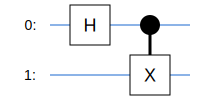

In [61]:
from tangelo.linq import Gate, Circuit

# Insert your code here
bell_pair_circuit = Circuit([Gate('H', 0), Gate('CNOT', target=1, control=0)])

# Use Tangelo to draw or print the circuit for a quick comparison with the reference picture
bell_pair_circuit.draw()

In [62]:
# You can also print a circuit
print(bell_pair_circuit)

Circuit object. Size 2 

H         target : [0]   
CNOT      target : [1]   control : [0]   



### 2. Hardware Efficient Ansatz

Research in quantum computer often calls building complex quantum circuits involving the repetition of operations that can generalize to arbitrary numbers of qubits. Tangelo was designed to make building circuits intuitive and easy: if you know how to use lists in Python, you pretty much already know how to build complex circuits in Tangelo ! In particular, the `+` and `*` operators will make your life easy.

Research from different groups, including IBM, has explored "Hardware Efficient Ansatz" circuits, which exhibit these traits. We will work on the example illustrated below:

![this circuit](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcThMadQYqXA2Ovtq2xv_ooTnQd-vEDR75FFlQ&usqp=CAU)

The sequence of gates between the square brackets applies a Rx rotation followed by a Rz rotation to each qubit, followed by CNOTs entangling successive qubit pairs (0 with 1, then 1 with 2...). This "layer" can be repeated an arbitrary amount of times `D` before an final layer consisting of another Rx and Rz gates is applied to each qubit.

> **Q:** Can you build a tangelo circuit that implements the sequence of gates between square brackets ? The circuit uses 4 qubits, and you can set the angles of all rotation gates to 0, for simplicity. We encourage you to use python features such as for loops or list comprehension.

In [63]:
# Insert your code here
gates = []
gates += [Gate('RX', i, parameter=0.)  for i in range(4)]
gates += [Gate('RZ', i, parameter=0.)  for i in range(4)]
gates += [Gate('CNOT', target=i+1, control=i) for i in range(3)]

c = Circuit(gates)
print(c)

Circuit object. Size 11 

RX        target : [0]   parameter : 0.0
RX        target : [1]   parameter : 0.0
RX        target : [2]   parameter : 0.0
RX        target : [3]   parameter : 0.0
RZ        target : [0]   parameter : 0.0
RZ        target : [1]   parameter : 0.0
RZ        target : [2]   parameter : 0.0
RZ        target : [3]   parameter : 0.0
CNOT      target : [1]   control : [0]   
CNOT      target : [2]   control : [1]   
CNOT      target : [3]   control : [2]   



Using the previous code cell as inspiration, we should be able to define a function in Python that can build the circuit in the reference picture for an arbitrary number of qubits `nq` and number of repetitions `d`.

> **Q:** Can you complete the code cell below to build `hea_circuit` with the desired behaviour ? Some variables have already been defined, for convenience.

In [64]:
def build_hea_circuit(nq, d):
    rot_gates = [Gate('RX', i, parameter=0.)  for i in range(nq)] + [Gate('RZ', i, parameter=0.)  for i in range(nq)]
    ctrl_gates = [Gate('CNOT', target=i+1, control=i) for i in range(nq-1)]

    # Insert your code here
    all_gates = (rot_gates + ctrl_gates)*d + rot_gates
    hea_circuit = Circuit(all_gates)
    
    return hea_circuit

# Insert code here: check that the case nq=4 and d=1 returns the circuit featured in the reference picture
hea_c = build_hea_circuit(4,1)

Quantum circuits can quickly grow complex. The `Circuit` class helps us track various quantities. 

> **Q:** In the case of (nq=3, d=2), how many gates do you expect to be present in your circuit ? Can you find an easy way to print:
> - the total number of gates in your circuit ?
> - the number of Rx, Rz, and CNOT gates ?

In [65]:
c = build_hea_circuit(3,2)

# Insert your code here
print(c.counts)
print(c.size)

{'RX': 9, 'RZ': 9, 'CNOT': 4}
22


You can type `dir(Circuit)` to see all the attributes, methods and magic methods defined on the `Circuit` class, and you can consult the resources defined at the beginning of this notebook. A few operators (`+`, `*`, etc) are defined for circuits, to replicate and concatenate them.

### 3. Variations of quantum circuits.

In Tangelo, the gates in a circuit can be traversed using "for" loops, and the different attributes of the gates can be examined. We can use this to easily create variations of circuits for all sorts of purposes (remove or replicate gates matching a specific pattern, add control qubits to others, perform some equivalent substitutions...).

Let's give it a try on the simple circuit below:

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


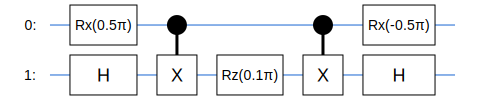

In [66]:
import numpy as np

gates = [Gate('RX', 0, parameter=np.pi/2), Gate('H', 1),
         Gate('CNOT', 1, 0), Gate('RZ', 1, parameter=np.pi/10), Gate('CNOT', 1, 0),
         Gate('RX', 0, parameter=-np.pi/2), Gate('H', 1)]

c1 = Circuit(gates)
c1.draw()

> **Q:** Below, we attempt to define a function `modify_circuit` that takes a circuit `c` as input and returns a new circuit such that:
> - `H` gates are discarded.
> - Every time a `Rz` gate is encountered, it is tagged as variational and the angle is divided by 2.
> - Each `CNOT` gate encountered is applied 3 times in a row instead of just 1 (e.g it is replicated and applied 2 additional times).

Can you complete the code cell below and verify that it has the desired behaviour on the circuit above ?

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


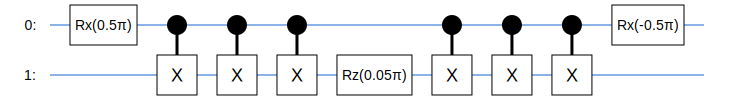

In [67]:
def modify_circuit(c):

    # Empty list that will contain the gates for our new circuit
    new_gates = []

    # This loop examines each gate in the input circuit, in order of appearance
    for gate in c:
        if gate.name == 'H':
            continue # Insert your code here
        elif gate.name == 'CNOT':
            new_gates += [gate]*3 # Insert your code here
        elif gate.name == 'RZ':
            new_gates.append(Gate('RZ', gate.target, parameter=gate.parameter/2, is_variational=True)) # Insert your code here
        else:
            new_gates.append(gate) # Insert your code here

    return Circuit(new_gates)

cmod = modify_circuit(c1)
cmod.draw()

# Final words

You have reached the end of this hands-on. You should now have a better idea of how to use quantum gates and circuits in Tangelo.

Do not hesitate to explore the resources mentioned at the beginning of this notebook at your own pace to learn more about the topics discussed here. There is so much more we can do.